In [20]:
#导入所需的库
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [21]:
# 3.2 if语句
x = 3
if x > 2:
    y = 2 * x
else:
    y = 3 * x
y

x = 1.5
if x > 2:
    y = 2 * x
else:
    y = 3 * x
y

4.5

In [22]:
# 3.2.2 ifelse语句
x = 1
y = 2 * x if x > 2 else 3 * x
y

3

In [23]:
# 使用列表代替switch，选择返回值
choices = [2 * 3, sum(range(1,6)) / len(range(1,6)), len([random.uniform(0,1) for _ in range(3)])]  # sum and len to mimic sd() for this example
choices[0]

choices[1]

choices[2]

x = "meat"
choice_map = {
    "meat": "chicken",
    "fruit": "apple",
    "vegetable": "potato"
}
choice_map.get(x)

'chicken'

In [24]:
# 3.3 循环语句
Fibonacci = [1, 1]  # 初始值的列表
n = 16
for i in range(2, n):
    Fibonacci.append(Fibonacci[i-2] + Fibonacci[i-1])
Fibonacci

Fibonacci = [1, 1]  # 重置列表
i = 1
while i + 1 < len(Fibonacci) and Fibonacci[i] + Fibonacci[i+1] < 1000:
    Fibonacci.append(Fibonacci[i] + Fibonacci[i+1])
    i += 1
Fibonacci

[1, 1]

In [25]:
# 3.3.3 repeat语句
Fibonacci = [1, 1]  # 重置列表
i = 1
while True:  # 模仿重复
    if i + 1 >= len(Fibonacci):
        break
    Fibonacci.append(Fibonacci[i] + Fibonacci[i+1])
    if Fibonacci[i] + Fibonacci[i+1] >= 1000:
        break
    i += 1
Fibonacci

[1, 1]

2.8284271247461903
Welcome to use Python
welcome Mr fang to use Python
0.08219864967252273
-0.6707319257991681
0.765269899295714
0.9617443677832547
0.6992654358512791


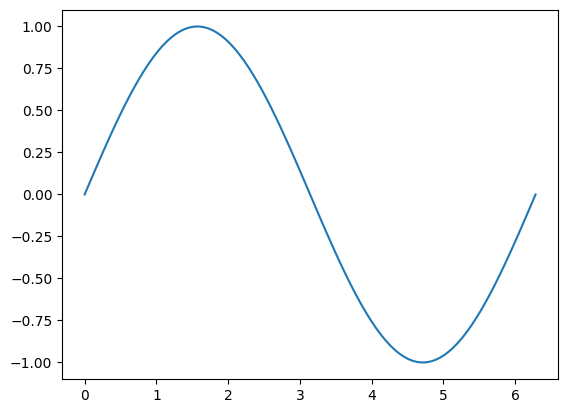

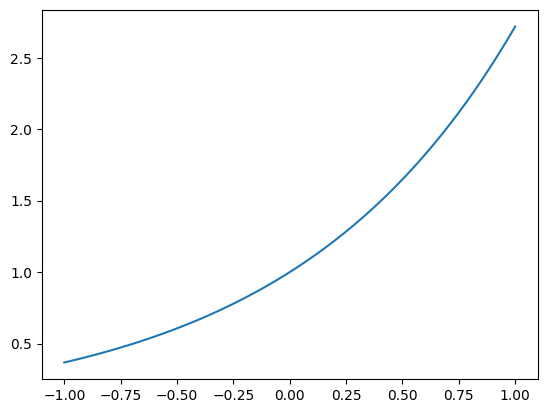

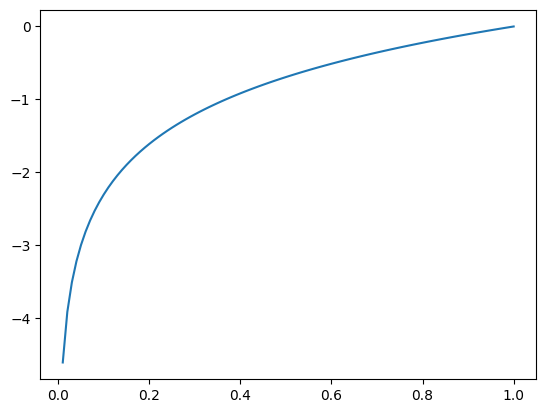

In [26]:
# 3.4 编写自己的函数 P41

def std(x):
    return np.sqrt(np.var(x))

x = np.array([1,3,5,7,9])
print(std(x))

def welcome():
    print("Welcome to use Python")

welcome()

def welcome_sb(names):
    print(f"welcome {names} to use Python")

welcome_sb("Mr fang")

def sim_t(n, mu=10, sigma=5):
    x = np.random.normal(mu, sigma, n)
    return (np.mean(x) - mu) / (np.std(x) / np.sqrt(n))

print(sim_t(5))
print(sim_t(5, 0, 1))
print(sim_t(5, 4))
print(sim_t(5, sigma=100))
print(sim_t(5, sigma=100, mu=1))

def plot_f(f, a, b, **kwargs):
    xvals = np.linspace(a, b, 100)
    plt.plot(xvals, f(xvals), **kwargs)
    plt.show()

plot_f(np.sin, 0, 2*np.pi)
plot_f(np.exp, -1, 1)
plot_f(np.log, 0.01, 1)  # Adjusted range to avoid log(0)


In [27]:
# 3.4.4 函数体和函数返回值

def my_average(x):
    return np.sum(x) / len(x)

print(my_average(np.array([1,2,3])))

def vms(x):
    xx = np.sort(x)[::-1][:5]
    xbar = np.mean(xx)
    return {'xbar': xbar, 'top5': xx}

y = np.array([5,15,32,25,26,28,65,48,3,37,45,54,23,44])
print(vms(y))

2.0
{'xbar': 51.2, 'top5': array([65, 54, 48, 45, 44])}


In [28]:
# 3.6 程序运行时间与效率

import time

start_time = time.time()
for _ in range(100):
    _ = np.median(np.random.uniform(size=1000))
print(time.time() - start_time)

start_time = time.time()
x = np.random.normal(size=100000)
y = np.random.normal(size=100000)
z = np.array([xi + yi for xi, yi in zip(x, y)])
print(time.time() - start_time)

start_time = time.time()
z = np.empty(100000)
for i in range(100000):
    z[i] = x[i] + y[i]
print(time.time() - start_time)

0.004762887954711914
0.01317906379699707
0.019273042678833008


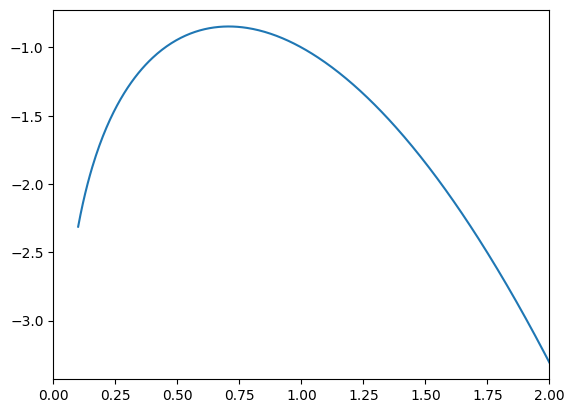

Maximum value: -0.8465735902800724 at x = 0.7071065577954291


In [29]:
# 3.7.1 一元函数优化求解
def f(x):
    return np.log(x) - x**2

x = np.linspace(0.1, 2, 400)
plt.plot(x, f(x))
plt.xlim([0, 2])
plt.show()

result = minimize(lambda x: -f(x), 1, bounds=[(0.1, 10)])
print("Maximum value:", -result.fun, "at x =", result.x[0])


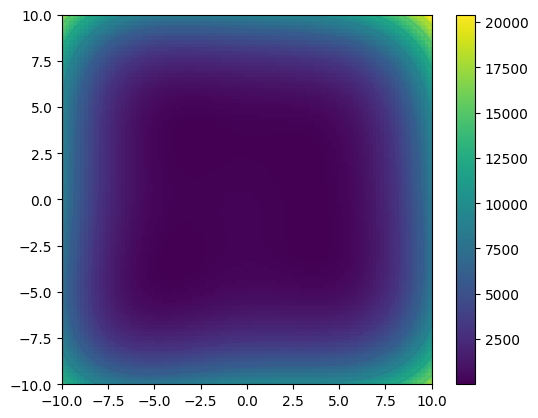

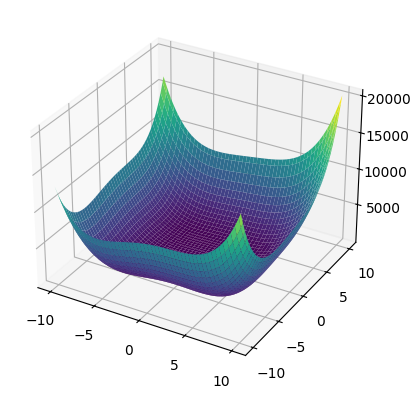

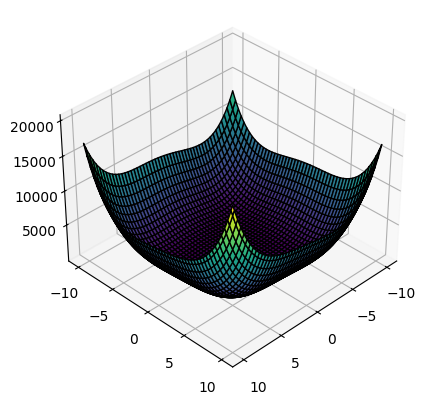

In [30]:
# 3.7.2 多元函数优化求解
x1 = x2 = np.linspace(-10, 10, 100)

def fr2(x1, x2):
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

def grr(x):
    x1, x2 = x
    dfdx1 = 2 * (2*x1*(x1**2 + x2 - 11) + (x1 + x2**2 - 7))
    dfdx2 = 2 * (x1**2 + x2 - 11 + 2*x2*(x1 + x2**2 - 7))
    return np.array([dfdx1, dfdx2])

z = np.array([[fr2(x1i, x2i) for x1i in x1] for x2i in x2])

plt.imshow(z, extent=[-10, 10, -10, 10], origin='lower')
plt.colorbar()
plt.contour(x1, x2, z)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X1, X2 = np.meshgrid(x1, x2)
ax.plot_surface(X1, X2, z, cmap='viridis')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(35, 45)
ax.plot_surface(X1, X2, z, cmap='viridis', edgecolor='k')
plt.show()